<a href="https://colab.research.google.com/github/kartikeyahl/Intro-to-DL/blob/main/Ass-0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score

# Load training data
X_train = pd.read_csv('train_in - Copy.csv', header=None).values
y_train = pd.read_csv('train_out - Copy.csv', header=None).values.flatten()

# Load test_ing data
X_test = pd.read_csv('test_in - Copy.csv', header=None).values
y_test = pd.read_csv('test_out - Copy.csv', header=None).values.flatten()

# Step 1: Calculate the centroid of each digit class (Cd)
centroids = []
for digit in range(10):
    # Select all training examples for digit 'd'
    X_digit = X_train[y_train == digit]
    # Compute the centroid (mean vector) for this digit class
    centroid = X_digit.mean(axis=0)
    centroids.append(centroid)

centroids = np.array(centroids)  # Shape: (10, 256)


# Step 2: Classify new images by finding the closest centroid
def classify_by_centroid(X, centroids):
    # Compute the distance between each test image and each centroid
    distances = cdist(X, centroids, metric='euclidean')  # Euclidean distance
    # Assign each image to the closest centroid (minimum distance)
    return np.argmin(distances, axis=1)

# Classify the test data
y_pred = classify_by_centroid(X_test, centroids)

# Calculate the accuracy of this simple classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy using centroids: {accuracy:.4f}")

# Step 3: Compute the distance between centroids
dist_matrix = cdist(centroids, centroids, metric='euclidean')

# Display the distances between centroids
print("Distance matrix between centroids (dist_ij):")
print(dist_matrix)


(10, 256)
Classification accuracy using centroids: 0.8040
Distance matrix between centroids (dist_ij):
[[ 0.         14.44960797  9.33455587  9.14373367 10.76984444  7.51929626
   8.15444313 11.86455505  9.90790174 11.48887494]
 [14.44960797  0.         10.12532258 11.7332329  10.17378643 11.11880041
  10.61470037 10.74315367 10.08677677  9.9320937 ]
 [ 9.33455587 10.12532258  0.          8.17828489  7.93254148  7.90679632
   7.33180754  8.87253107  7.07751618  8.88774785]
 [ 9.14373367 11.7332329   8.17828489  0.          9.0876078   6.11875002
   9.30206473  8.92240093  7.02042489  8.35435012]
 [10.76984444 10.17378643  7.93254148  9.0876078   0.          8.00151741
   8.78223265  7.58301228  7.38090899  6.01040793]
 [ 7.51929626 11.11880041  7.90679632  6.11875002  8.00151741  0.
   6.69869172  9.21195402  6.96738648  8.25853807]
 [ 8.15444313 10.61470037  7.33180754  9.30206473  8.78223265  6.69869172
   0.         10.8882374   8.58722228 10.44000352]
 [11.86455505 10.74315367  8.8

[[ 4.81139496 -5.65778233]
 [ 6.6199039  -1.02500685]
 [ 1.03275594  2.2030221 ]
 ...
 [-3.76263549  5.42925842]
 [-3.75140914  2.30098839]
 [-0.05341531  4.41827067]]


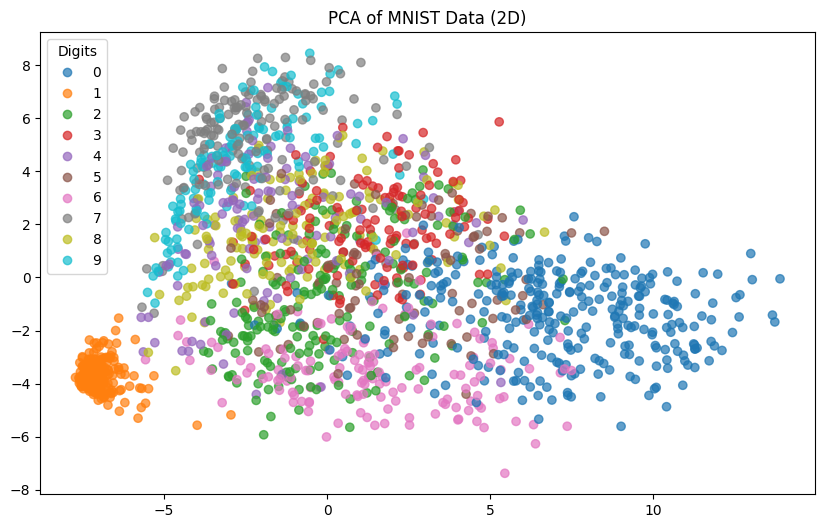

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
print(X_train_pca)
# Plot the PCA-reduced data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('PCA of MNIST Data (2D)')
plt.show()
